In [63]:
import pandas as pd
from datetime import datetime, timedelta

logins = pd.read_json('logins.json')
ult_data_challenge = pd.read_json('ultimate_data_challenge.json')

In [64]:
ult_data_challenge.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [65]:
ult_data_challenge.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [66]:
# Imputing mean and most common values for NaN's
# https://stackoverflow.com/questions/32617811/imputation-of-missing-values-for-categories-in-pandas
ult_data_challenge.avg_rating_of_driver.fillna(ult_data_challenge.avg_rating_of_driver.mean(), inplace=True)
ult_data_challenge.avg_rating_by_driver.fillna(ult_data_challenge.avg_rating_by_driver.mean(), inplace=True)
ult_data_challenge.phone.fillna(ult_data_challenge.phone.value_counts().index[0], inplace=True)

<AxesSubplot:ylabel='retained_user'>

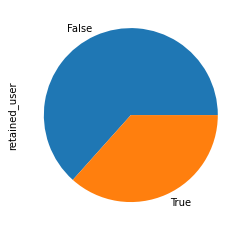

In [67]:
# convert columns to pandas datetime type
ult_data_challenge.signup_date = pd.to_datetime(ult_data_challenge.signup_date)
ult_data_challenge.last_trip_date = pd.to_datetime(ult_data_challenge.last_trip_date)

# determine threshold for "active and retained" user definition
current_date = max(ult_data_challenge.last_trip_date)
active_period = timedelta(days=30)  
active_threshold = current_date - active_period

# label users as retained 1/0
ult_data_challenge['retained_user'] = (ult_data_challenge.last_trip_date > active_threshold)
ult_data_challenge.retained_user.value_counts().plot(kind='pie')

<AxesSubplot:ylabel='ultimate_black_user'>

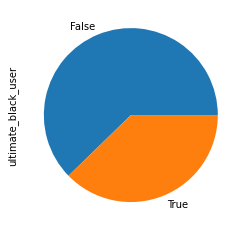

In [68]:
ult_data_challenge.ultimate_black_user.value_counts().plot(kind='pie')

In [69]:
ult_data_challenge.groupby(['retained_user','ultimate_black_user']).size()

retained_user  ultimate_black_user
False          False                  22195
               True                    9495
True           False                   8951
               True                    9359
dtype: int64

<AxesSubplot:ylabel='None'>

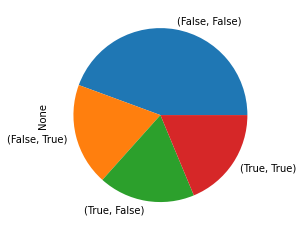

In [70]:
ult_data_challenge.groupby(['retained_user','ultimate_black_user']).size().plot(kind='pie')

<AxesSubplot:ylabel='Frequency'>

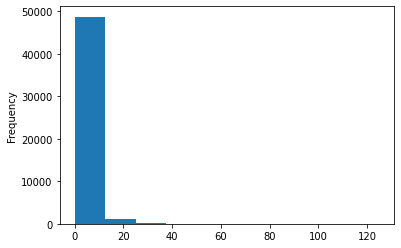

In [71]:
ult_data_challenge.trips_in_first_30_days.plot(kind='hist')

In [72]:
ult_data_challenge.avg_rating_of_driver

0        4.700000
1        5.000000
2        4.300000
3        4.600000
4        4.400000
           ...   
49995    5.000000
49996    4.601559
49997    5.000000
49998    3.000000
49999    4.601559
Name: avg_rating_of_driver, Length: 50000, dtype: float64

<AxesSubplot:ylabel='Frequency'>

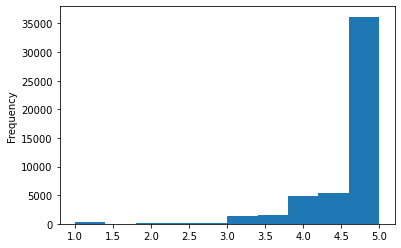

In [73]:
ult_data_challenge.avg_rating_of_driver.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

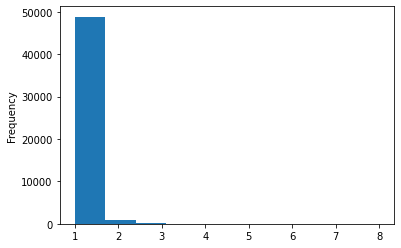

In [74]:
ult_data_challenge.avg_surge.plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

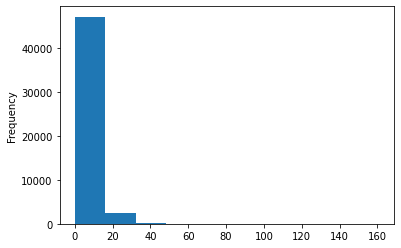

In [75]:
ult_data_challenge.avg_dist.plot(kind='hist')

In [76]:
# Feature Engineering for adopted_user classification model:
# 'city' has 3 categories, target encode after split                            DONE
# 'phone' has 2 categories, target encode after split                           DONE
# 'signup_date' is datetime, convert to unix and min/max scale                  DONE
# 'avg_rating_of_driver' left skewed, log transform, min/max scale              DONE
# 'avg_rating_by_driver' left skewed, log transform, min/max scale              DONE
# 'trips_in_first_30_days' right skewed, log transform, min/max scale           DONE
# 'surge_pct' right skewed, log transform, min/max scale                        DONE
# 'avg_surge' right skewed, log transform, min/max scale                        DONE
# 'avg_dist' right skewed, log transform, min/max scale                         DONE
# 'ultimate_black_user' T/F, convert to 1/0                                     DONE
# 'weekday_pct' min/max scale                                                   DONE
# 'last_trip_date' is used to determine the target variable, cannot be used     DONE
# 'retained_user' target variable T/F, convert to 1/0                           DONE

ult_data_challenge.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,True
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,False
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,False
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,True
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,False


In [77]:
# Convert T/F to 1/0
ult_data_challenge.ultimate_black_user = ult_data_challenge.ultimate_black_user.astype(int)
ult_data_challenge.retained_user = ult_data_challenge.retained_user.astype(int)

# Log transform of 6 columns listed above
from sklearn.preprocessing import PowerTransformer
features = ult_data_challenge[['avg_rating_of_driver', 'avg_rating_by_driver', \
                               'trips_in_first_30_days', 'surge_pct', 'avg_surge', 'avg_dist']]
log = PowerTransformer()
log.fit(features)
ult_data_challenge[['log_avg_rating_of_driver', 'log_avg_rating_by_driver', 'log_trips_in_first_30_days', \
                    'log_surge_pct', 'log_avg_surge', 'log_avg_dist']] = (log.transform(features))

In [78]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import datetime
import time

# New column, signup date as unix integer timestamp
ult_data_challenge['signup_date_unix'] = [time.mktime(x.timetuple()) for x in ult_data_challenge.signup_date]

# Min/Max scale 8 columns listed above
features = ult_data_challenge[['log_avg_rating_of_driver', 'log_avg_rating_by_driver', 'log_trips_in_first_30_days', \
                    'log_surge_pct', 'log_avg_surge', 'log_avg_dist', 'signup_date_unix', 'weekday_pct']]
ult_data_challenge[['scale_log_avg_rating_of_driver', 'scale_log_avg_rating_by_driver', 'scale_log_trips_in_first_30_days', \
                    'scale_log_surge_pct', 'scale_log_avg_surge', 'scale_log_avg_dist', 'scale_signup_date_unix', 'scale_weekday_pct']] \
                    = scaler.fit_transform(features)

In [79]:
from imblearn.over_sampling import SMOTE
from collections import Counter
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Perform train/test split with final features
X = ult_data_challenge[['city', 'phone', 'ultimate_black_user',
       'scale_log_avg_rating_of_driver', 'scale_log_avg_rating_by_driver',
       'scale_log_trips_in_first_30_days', 'scale_log_surge_pct',
       'scale_log_avg_surge', 'scale_log_avg_dist', 'scale_signup_date_unix',
       'scale_weekday_pct']]
y = ult_data_challenge['retained_user']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True)

# Target encoding for two categorical features
tar_enc = ce.TargetEncoder(cols=['city', 'phone'],
       min_samples_leaf=5, smoothing=3).fit(X_train, y_train)
X_train = tar_enc.transform(X_train)
X_test = tar_enc.transform(X_test)

X_train.head()

,city,phone,ultimate_black_user,scale_log_avg_rating_of_driver,scale_log_avg_rating_by_driver,scale_log_trips_in_first_30_days,scale_log_surge_pct,scale_log_avg_surge,scale_log_avg_dist,scale_signup_date_unix,scale_weekday_pct
30923,0.626102,0.194725,1,1.000000,1.0,0.514640,0.0,0.0,0.465955,0.333333,0.000
20808,0.243682,0.440077,1,0.485743,1.0,0.431636,0.0,0.0,0.685389,0.666667,0.250
30844,0.626102,0.440077,0,1.000000,1.0,0.000000,0.0,0.0,0.737296,0.500000,1.000
47735,0.243682,0.440077,1,1.000000,1.0,0.431636,0.0,0.0,0.334610,0.833333,0.333
12271,0.339373,0.440077,0,0.653342,1.0,0.431636,0.0,0.0,0.599757,0.600000,0.714


In [80]:
ult_data_challenge.iloc[[45864]]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,...,log_avg_dist,signup_date_unix,scale_log_avg_rating_of_driver,scale_log_avg_rating_by_driver,scale_log_trips_in_first_30_days,scale_log_surge_pct,scale_log_avg_surge,scale_log_avg_dist,scale_signup_date_unix,scale_weekday_pct
45864,Astapor,0,2014-01-28,4.601559,1.0,2014-05-13,Android,0.0,0,100.0,...,1.633352,1.390896e+09,0.565396,1.0,0.0,0.0,0.0,0.73121,0.9,1.0


In [81]:
X_train.scale_log_avg_rating_of_driver.isna().value_counts()

False    35000
Name: scale_log_avg_rating_of_driver, dtype: int64

In [82]:
import numpy as np
np.any(np.isnan(X_train))

False

In [83]:
counter = Counter(y_train)
print('Before', counter)
smt = SMOTE()
X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)
counter = Counter(y_train_smt)
print('After', counter)

Before Counter({0: 22174, 1: 12826})
After Counter({0: 22174, 1: 22174})


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Grid Search from: https://stackoverflow.com/questions/38151615/specific-cross-validation-with-random-forest
clf = RandomForestClassifier()  
param_grid = {'n_estimators': [10,30,50,70,100], 'max_depth': [None], 'max_features': [3,6,9,None],
    'min_samples_leaf': [1,2,3]}

grid_clf = GridSearchCV(clf, param_grid, cv=5)
grid_clf.fit(X_train_smt, y_train_smt)

print(grid_clf.best_estimator_)

RandomForestClassifier(max_features=3, n_estimators=70)


In [86]:
cv_res = pd.DataFrame(grid_clf.cv_results_)
cv_res[cv_res['rank_test_score']<=5].sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,4.181096,0.177925,0.179513,0.018506,None,3,1,70,"{'max_depth': None, 'max_features': 3, 'min_sa...",0.779594,0.772153,0.793236,0.880257,0.881159,0.821280,0.048993,1
4,5.573105,0.280138,0.254175,0.027356,None,3,1,100,"{'max_depth': None, 'max_features': 3, 'min_sa...",0.780271,0.771139,0.790643,0.880257,0.882174,0.820897,0.049639,2
9,5.133713,0.635465,0.213016,0.016208,None,3,2,100,"{'max_depth': None, 'max_features': 3, 'min_sa...",0.781172,0.777339,0.793461,0.875070,0.874394,0.820287,0.044772,3
2,3.718589,0.782842,0.191722,0.099723,None,3,1,50,"{'max_depth': None, 'max_features': 3, 'min_sa...",0.776437,0.771928,0.790079,0.881385,0.880032,0.819972,0.049951,4
7,2.672765,0.249310,0.106165,0.018017,None,3,2,50,"{'max_depth': None, 'max_features': 3, 'min_sa...",0.781849,0.776437,0.792446,0.873266,0.874507,0.819701,0.044543,5


ACCURACY:  0.7765333333333333
PRECISION:  0.7014361300075586
RECALL:  0.6768781911013858
F1:  0.6889383815887156


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

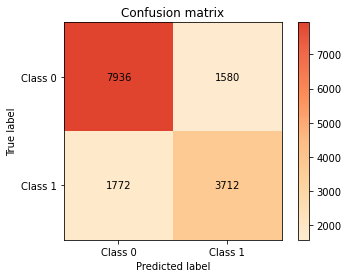

In [89]:
from sklearn_evaluation import plot
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf = RandomForestClassifier(max_depth = None, max_features=3, min_samples_leaf=1, n_estimators=70)
clf.fit(X_train_smt, y_train_smt)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)

# using metrics module for accuracy calculation
print('ACCURACY: ', metrics.accuracy_score(y_test, y_pred))
print('PRECISION: ', metrics.precision_score(y_test, y_pred))
print('RECALL: ', metrics.recall_score(y_test, y_pred))
print('F1: ', metrics.f1_score(y_test, y_pred))
plot.confusion_matrix(y_test, y_pred)

Text(0, 0.5, 'Mean decrease in impurity')

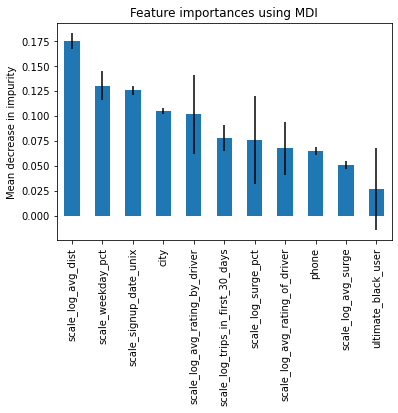

In [90]:
# feature importance
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
import matplotlib.pyplot as plt
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")

In [91]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
param_grid = {'n_neighbors': [2,3,4,5,7]}
grid_neigh = GridSearchCV(neigh, param_grid, cv=5)
grid_neigh.fit(X_train_smt, y_train_smt)

print(grid_neigh.best_estimator_)

RandomForestClassifier(max_features=3, n_estimators=70)


In [92]:
cv_res = pd.DataFrame(grid_neigh.cv_results_)
cv_res[cv_res['rank_test_score']<=5].sort_values(by=['rank_test_score'])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1,0.160894,0.009655,1.484331,0.083829,3,{'n_neighbors': 3},0.763472,0.756821,0.773168,0.814522,0.812831,0.784163,0.024658,1
0,0.219595,0.065008,1.741353,0.407566,2,{'n_neighbors': 2},0.748253,0.745772,0.751747,0.821739,0.821626,0.777827,0.035858,2
3,0.170716,0.011542,1.892419,0.192112,5,{'n_neighbors': 5},0.761105,0.756708,0.760767,0.806066,0.801669,0.777263,0.021822,3
2,0.168385,0.016479,1.633837,0.109595,4,{'n_neighbors': 4},0.756032,0.748591,0.761781,0.810802,0.808321,0.777105,0.026840,4
4,0.206337,0.017524,3.416758,0.256332,7,{'n_neighbors': 7},0.759301,0.753664,0.760992,0.796031,0.793212,0.772640,0.018133,5


ACCURACY:  0.7164666666666667
PRECISION:  0.5958573430929762
RECALL:  0.6976659372720642
F1:  0.642755144897102


<AxesSubplot:title={'center':'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

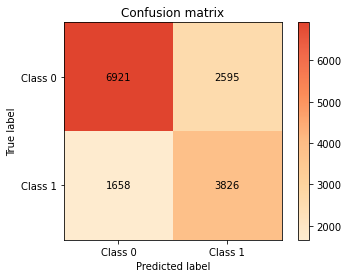

In [94]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train_smt, y_train_smt)
y_pred = neigh.predict(X_test)

from sklearn_evaluation import plot
print('ACCURACY: ', metrics.accuracy_score(y_test, y_pred))
print('PRECISION: ', metrics.precision_score(y_test, y_pred))
print('RECALL: ', metrics.recall_score(y_test, y_pred))
print('F1: ', metrics.f1_score(y_test, y_pred))
plot.confusion_matrix(y_test, y_pred)